In [14]:
# import packages
import pandas as pd
import numpy as np
columns = ['target','ids','date','flag','user','text']

data = pd.read_csv('file.zip', encoding= 'latin-1', header=None)
data.columns = columns

data = data.sample(n=500000,random_state=22)

data.head()

,target,ids,date,flag,user,text
1013875,4,1881370700,Fri May 22 04:27:56 PDT 2009,NO_QUERY,FreshPlastic,#followfriday @foyboy 1) She had Skips on her ...
1064419,4,1964672525,Fri May 29 14:36:52 PDT 2009,NO_QUERY,CarebearJK,@PaulaAbdul we are finally starting to see the...
290763,0,1995464536,Mon Jun 01 13:31:56 PDT 2009,NO_QUERY,jessicabalicki,w. all my old coworkers going to the wake RIP...
770144,0,2301890082,Tue Jun 23 16:03:01 PDT 2009,NO_QUERY,dlphntat,"yeah, Bravo TV. I so wanna learn more about th..."
1266526,4,1999668574,Mon Jun 01 20:36:58 PDT 2009,NO_QUERY,stevefroisland,"@JCTrick Thanks, J! I think I'm almost getting..."


In [15]:
# import packages
import numpy as np
import re

def remove_pattern(input_txt,pattern):
    r = re.findall(pattern, input_txt)
    for match in r:
        input_txt=re.sub(match,'',input_txt)
    return input_txt

data['clean_text'] = data['text'].apply(lambda row:remove_pattern(row, '@[\w]*'))

In [16]:
data['clean_text'].head()

1013875    #followfriday  1) She had Skips on her face ea...
1064419     we are finally starting to see the sun and wa...
290763     w. all my old coworkers going to the wake  RIP...
770144     yeah, Bravo TV. I so wanna learn more about th...
1266526     Thanks, J! I think I'm almost getting the han...
Name: clean_text, dtype: object

In [17]:
# import packages
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't"]

data['tokenized_text'] = data['clean_text'].apply(lambda row: nltk.word_tokenize(row))

In [18]:
data['tokenized_text'] = data['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

stemmer = PorterStemmer()
data['tokenized_text'] = data['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])

data['tokenized_text'] = data['tokenized_text'].apply(lambda x: ' '.join(x))

data['tokenized_text'].head()

1013875    followfriday 1 she skip face earlier week 2 na...
1064419                final start see sun warm weather yipe
290763                 w. old cowork go wake rip michel xoxo
770144     yeah bravo TV I wan na learn real housew orang...
1266526                 thank J I think I 'm almost get hang
Name: tokenized_text, dtype: object

In [19]:
data.shape

(500000, 8)

(-0.5, 799.5, 499.5, -0.5)

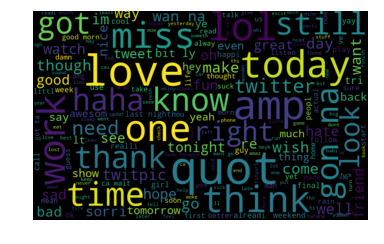

In [23]:
# import packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in data['tokenized_text']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

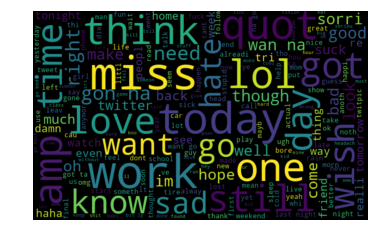

In [24]:
#neg_words  =data['tokenized_text'][data['target'] == 0]

neg_words = ' '.join([text for text in data['tokenized_text'][data['target'] == 0]])



neg_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words)

plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')

In [38]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# ratio to split into training and test set
ratio = int(len(data)*0.75)

# logistic regression model
logreg = LogisticRegression(random_state=2)

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000 , stop_words='english')

tweets = tfidf_vectorizer.fit_transform(data['tokenized_text'])

data['target'].replace(4,1,inplace=True)

X_train,X_test,y_train,y_test = train_test_split(tweets,data['target'],test_size=0.3,stratify=data['target'])
# X_train = tweets[:ratio,:]
# X_test = tweets[ratio:,:]
# y_train = data['target'].iloc[:ratio]
# y_test = data['target'].iloc[ratio:]

logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)

#prediction_int = prediction[:,1] >= 0.3

#prediction_int =  prediction_int.astype(np.int)

accuracy = accuracy_score(y_test, prediction)

print(accuracy)

C:\Users\jibraan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7450533333333333


In [41]:
# import packages
from textblob import TextBlob


tb_polarity = []

for sentence in data['tokenized_text']:
    temp = TextBlob(sentence)
    tb_polarity.append(temp.sentiment[0])

data['tb_polarity'] = tb_polarity

In [42]:
tb_polarity

[0.3666666666666667,
 0.3,
 0.1,
 0.0,
 0.0,
 0.0,
 0.35,
 -0.6999999999999998,
 0.6,
 0.0,
 -0.6999999999999998,
 0.7,
 0.0,
 0.0,
 0.4,
 0.0,
 0.3,
 -0.7142857142857143,
 0.0,
 0.0,
 0.0,
 0.20833333333333331,
 0.7,
 0.0,
 0.65,
 0.0,
 0.6333333333333334,
 0.2857142857142857,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.05,
 -0.25,
 0.0,
 -0.024999999999999994,
 -0.13181818181818183,
 0.0,
 -0.1,
 0.15,
 0.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.52,
 0.0,
 0.55,
 0.0,
 0.225,
 0.6,
 0.13636363636363635,
 0.0,
 0.6,
 -0.5,
 0.27878787878787875,
 0.050000000000000044,
 0.0,
 -0.15,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.2,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.2,
 0.0,
 0.1,
 0.0,
 0.2857142857142857,
 0.8,
 0.25,
 0.35000000000000003,
 0.0,
 -0.8,
 0.0,
 0.0,
 0.13636363636363635,
 0.0,
 -0.19166666666666668,
 0.5,
 0.8,
 0.0,
 0.0,
 0.0,
 0.3181818181818182,
 0.6,
 0.0,
 0.03333333333333333,
 0.0,
 0.0,
 0.8,
 -0.19444444444444442,
 0.0,
 -0.6999999999999998,
 0.13636363636363635,
 -0.2071

In [45]:
# import packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()
vs_polarity = []

for sentence in data['tokenized_text']:
    vs_polarity.append(analyser.polarity_scores(sentence)['compound'])

data['vs_polarity'] = vs_polarity

In [47]:
vs_polarity

[0.4588,
 0.2263,
 0.6124,
 0.296,
 0.3612,
 -0.6124,
 0.7003,
 -0.5423,
 0.4215,
 0.0,
 -0.5423,
 0.4404,
 0.0,
 0.0,
 0.3612,
 0.0,
 -0.4019,
 -0.5106,
 -0.6908,
 0.4404,
 0.0,
 0.0,
 0.4404,
 0.0,
 0.8176,
 -0.5106,
 0.872,
 -0.3182,
 0.4404,
 0.0772,
 -0.3612,
 0.0,
 0.0,
 -0.2263,
 -0.4019,
 0.2924,
 0.296,
 -0.4767,
 0.0,
 0.0,
 0.3818,
 0.4404,
 0.3612,
 0.0,
 0.0,
 0.6124,
 0.0,
 0.9524,
 -0.1531,
 0.8591,
 -0.4215,
 0.6369,
 0.4215,
 0.4939,
 0.0,
 0.6486,
 -0.6369,
 0.743,
 0.4767,
 0.3612,
 0.3612,
 0.7717,
 0.296,
 0.3182,
 0.0,
 0.0,
 0.2732,
 0.296,
 0.0,
 0.7717,
 0.0,
 0.0,
 -0.1779,
 0.4404,
 0.0,
 0.2023,
 0.0,
 -0.25,
 -0.1779,
 0.0,
 0.7717,
 -0.4404,
 0.926,
 0.0,
 -0.6249,
 0.0,
 0.0,
 0.0,
 0.0,
 0.296,
 0.6705,
 0.6249,
 0.0,
 0.0,
 0.4404,
 0.6369,
 0.5994,
 -0.296,
 0.25,
 0.0,
 0.2732,
 0.4215,
 -0.1531,
 0.0,
 -0.5423,
 0.0,
 -0.7845,
 0.6369,
 0.5904,
 0.0,
 -0.7184,
 0.765,
 0.0,
 -0.4767,
 0.6369,
 0.8519,
 0.5859,
 -0.6808,
 0.3182,
 0.0,
 0.7964,
 -0.15